# Loading libraries and object

In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)
library(pheatmap, warn.conflicts = FALSE)
library(tidyr)
library(ggpubr)
library(data.table)
library(AUCell)
library(paletteer, lib.loc="../R/4.0/library")
library(prismatic, lib.loc="../R/4.0/library")
library(lme4, lib.loc = '../R/4.0/library/')
library(ComplexHeatmap)
library(readxl)
library(biomaRt)
library(stringr)
library(fgsea)
library(SeuratWrappers)

source("../code/process_data.R")

new.cols <- paletteer::paletteer_d("ggthemes::Tableau_20")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization

In [9]:
matrix <- readMM("lymphoid_matrix.mtx")
barcodes <- read.table("lymphoid_barcodes.tsv", header = FALSE, stringsAsFactors = FALSE)
genes <- read.table("lymphoid_genes.tsv", header = FALSE, stringsAsFactors = FALSE)
metadata <- read.csv("lymphoid_metadata.csv", header = TRUE, row.names = 1)
rownames(matrix) <- genes$V1
colnames(matrix) <- barcodes$V1
object <- CreateSeuratObject(counts = matrix)
object <- AddMetaData(object, metadata = metadata)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


# FastMNN Integration

In [7]:
future::plan('multisession', workers = 6)
options(future.globals.maxSize = 3 * 1024^3)
DefaultAssay(object) <- "RNA"

object <- NormalizeData(object)
object <- FindVariableFeatures(object)
object <- RunFastMNN(object.list = SplitObject(object, split.by = "patient_code"))
object <- ScaleData(object) 
object <- FindNeighbors(object, reduction = "mnn", dims = 1:30)
object <- RunUMAP(object, reduction = "mnn", dims = 1:30)
object <- RunTSNE(object, reduction = "mnn", dims = 1:30)
object <- FindClusters(object, resolution = 1)

future::plan('sequential')

Normalizing layer: counts

Finding variable features for layer counts

Computing 2000 integration features

Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22541
Number of edges: 810846

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8669
Number of communities: 16
Elapsed time: 4 seconds


# Lymphoid: Assign labels to clusters
Note: Cluster assignments are already stored in metadata

Warning message:
“The following requested variables were not found: NKG2D, CD45RA”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior s

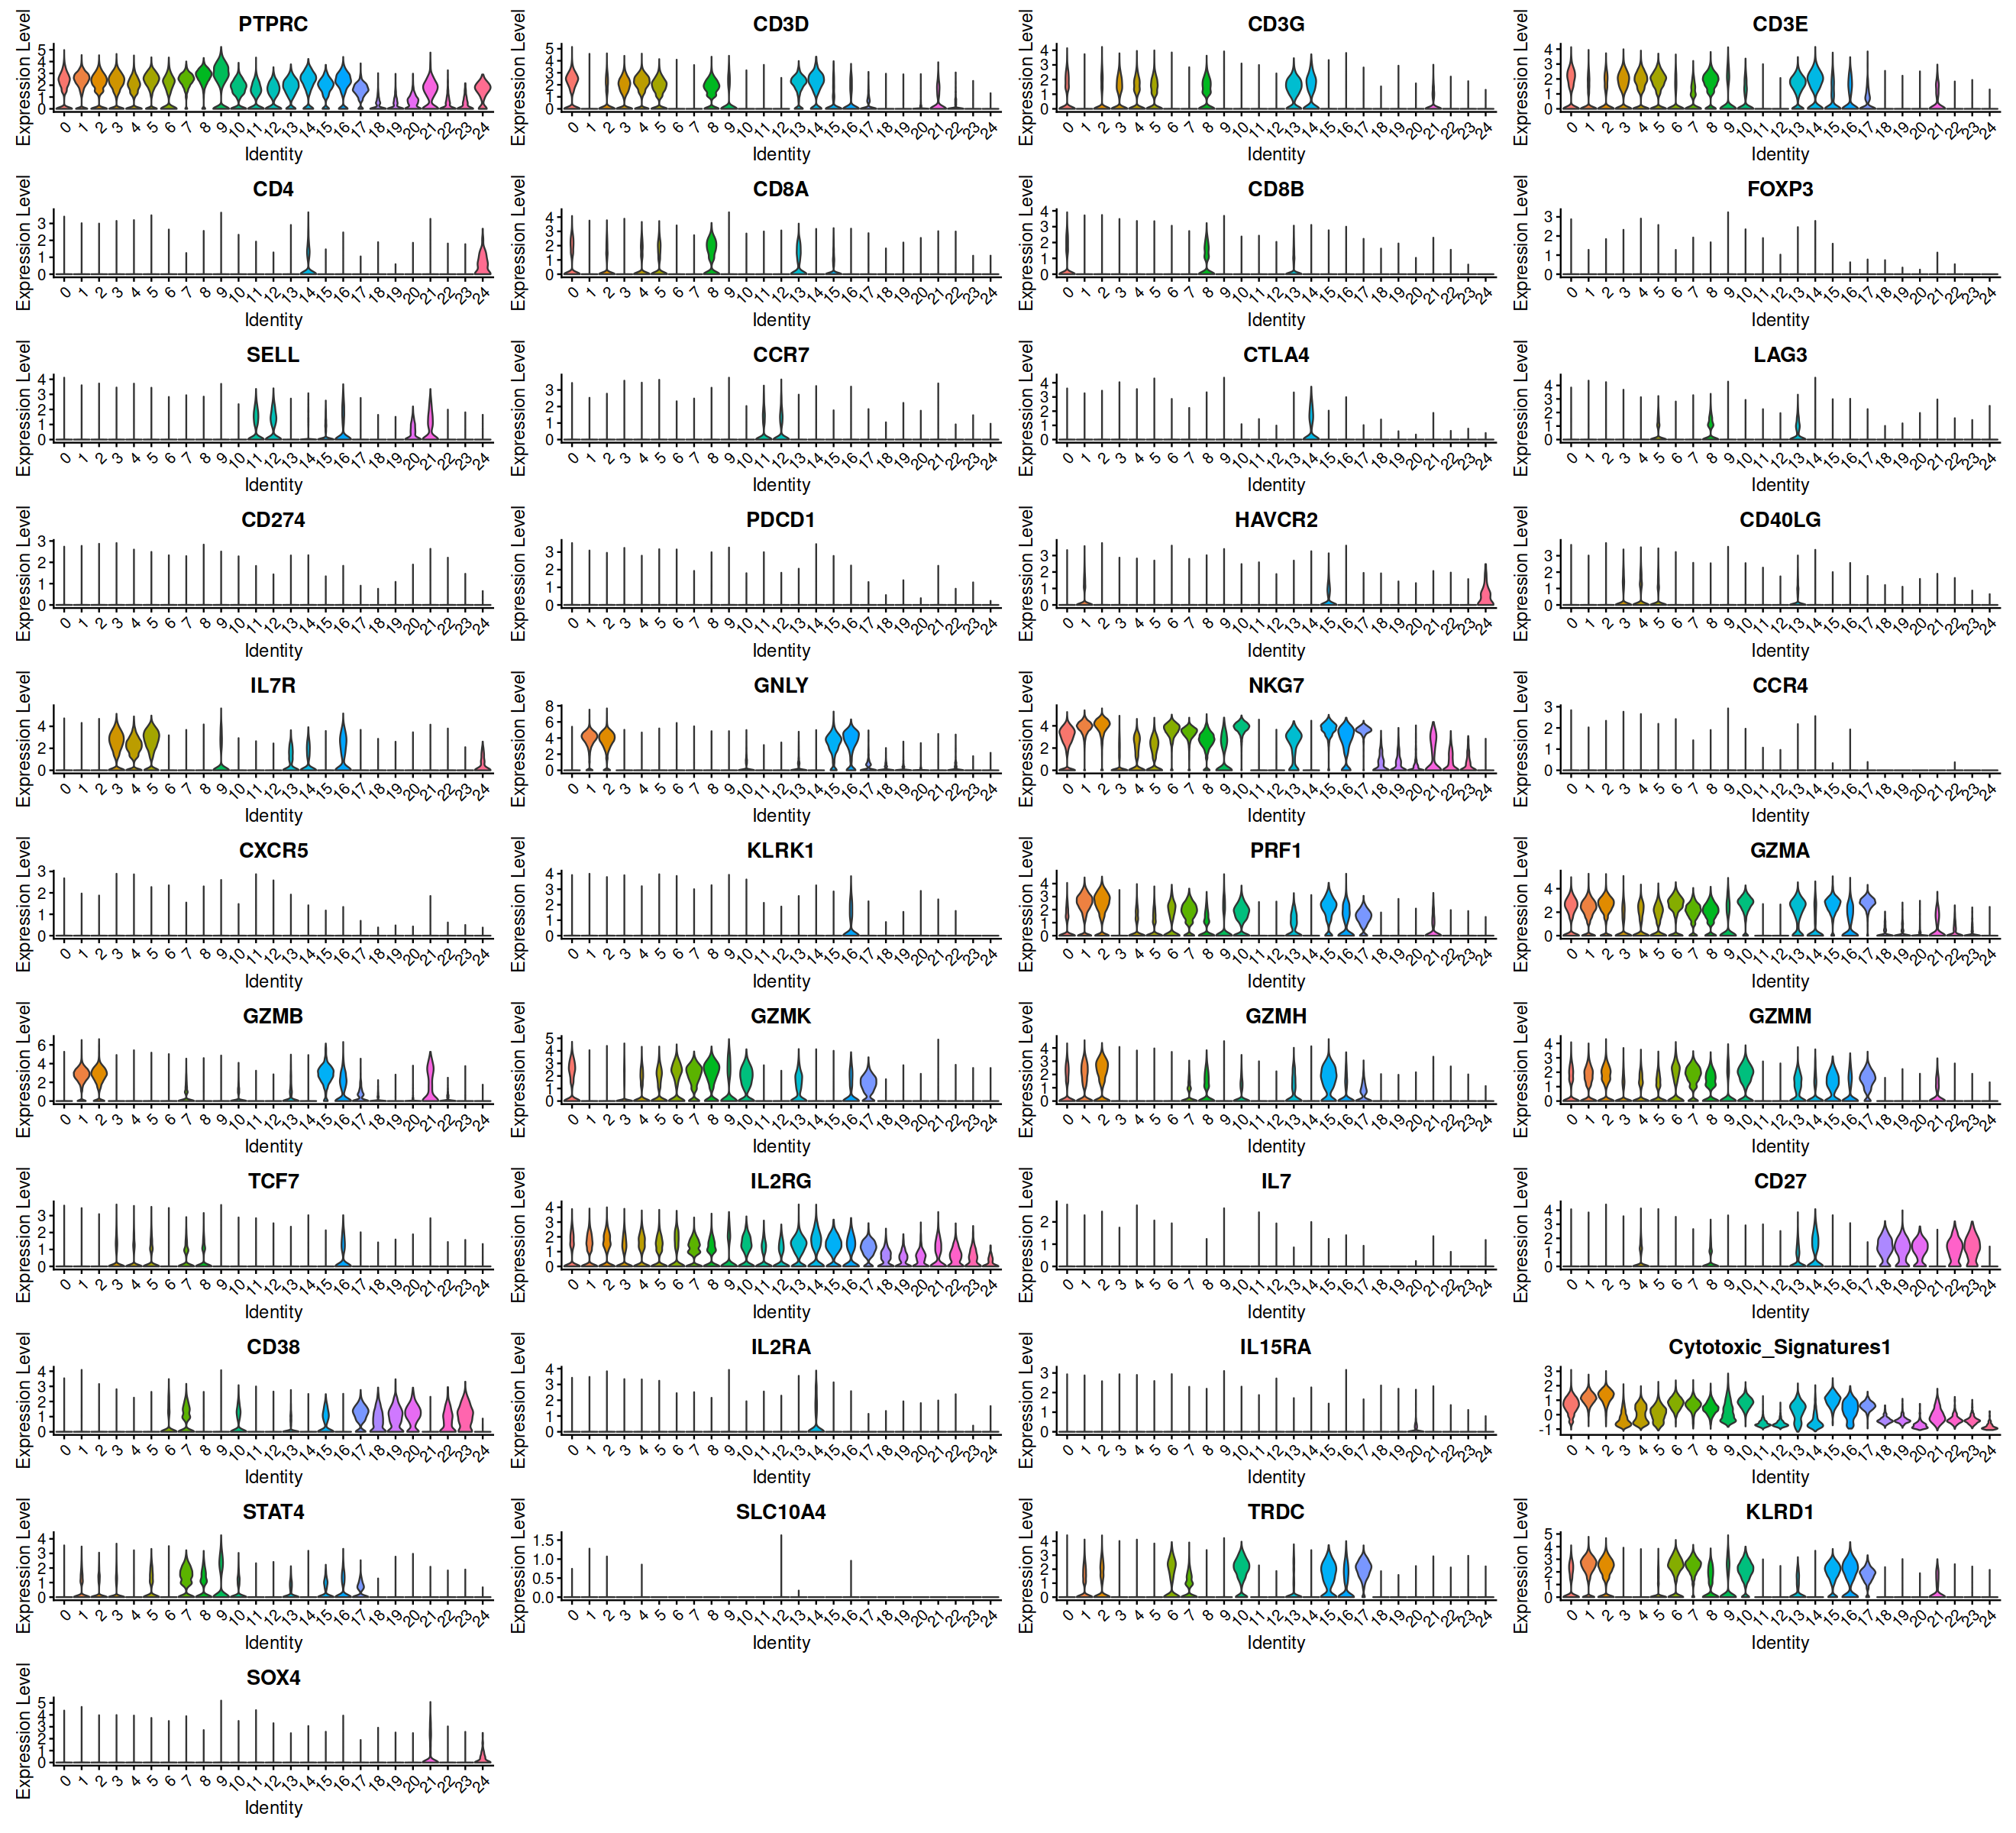

In [38]:
options(repr.plot.height = 20, repr.plot.width = 22)
VlnPlot(object, features = c("PTPRC","CD3D","CD3G","CD3E","CD4","CD8A","CD8B","FOXP3","SELL",
                                                     "CCR7","CTLA4","LAG3","CD274", "PDCD1","HAVCR2","CD40LG","IL7R",
                                                    "GNLY", "NKG2D","NKG7","CCR4", "CXCR5","KLRK1","PRF1", "GZMA","GZMB",
                                                    "GZMK","GZMH","GZMM",  "CD45RA", "CCR7", "SELL","TCF7", "IL7R","IL2RG", 
                                                     "IL7","CD27","CD38", "IL2RA", "IL15RA",
                             "Cytotoxic_Signatures1", "STAT4", "SLC10A4", "TRDC", "KLRD1", "SOX4"),
                            pt.size = 0, assay = "RNA", ncol = 4, group.by = "seurat_clusters")




In [ ]:
 current.cluster.ids <- c(c(24),
                         c(14),
                         c(18, 19, 20, 22, 23),
                         c(21),
                         c(11, 12),
                         c(13, 15, 17),
                         c(1, 2, 16),
                         c(6, 10),
                         c(3, 4, 5),
                         c(0),
                         c(7, 8, 9))
 new.cluster.ids <- c(c("HAVCAR2_CD4_T_cell"), 
                     c("CD4_Tregs"),
                     c("Plasma_B_cell","Plasma_B_cell","Plasma_B_cell","Plasma_B_cell","Plasma_B_cell"), 
                     c("Pro_B_cell"), 
                     c("Memory_B_cell", "Memory_B_cell"), 
                     c("Proliferating_CD8_CTLs", "Proliferating_CD8_CTLs", "Proliferating_CD8_CTLs"),
                     c("FGFBP2_NK", "FGFBP2_NK", "FGFBP2_NK"),
                     c("XCL1_NK", "XCL1_NK"),
                     c("Naive_T_cell", "Naive_T_cell", "Naive_T_cell"),
                     c("CD8_CTLs"),
                     c("Memory_T_cell", "Memory_T_cell", "Memory_T_cell"))
                     
 new.cluster.ids
 object@active.ident <- plyr::mapvalues(x = object@active.ident, from = current.cluster.ids, to = new.cluster.ids)

 cell_type_df <- tibble::enframe( Idents(object), name="cell.name", value="cluster" ) %>% tibble::column_to_rownames("cell.name") 
 object <- AddMetaData( object, cell_type_df )

# Lymphoid: tSNE

### subset object by sample_types

In [9]:
mme <- subset(object, subset = sample_type == "MME")

CCME <- subset(object, subset = sample_type == "CCME")

HME <- subset(object, subset = sample_type == "HME")


table(object$sample_type)


 CCME   HME   MME 
13472 88206  5093 

### sub-sample equal number of cells from each sample_types

In [10]:
# Object MME is the  Seurat object with lowest number of cells (5093)

# Sample from HME and mme as many cells as there are cells in CCME
# For reproducibility, set a random seed
cell.number <- min(table(object$sample_type)) # 5093
set.seed(112)
subsampled_mme <- mme[, sample(colnames(mme), size =cell.number, replace=F)]
subsampled_CCME <- CCME[, sample(colnames(CCME), size =cell.number, replace=F)]
subsampled_HME <- HME[, sample(colnames(HME), size =cell.number, replace=F)]

##  Merge your Seurat objects
obj.merged <- merge(subsampled_mme, c(subsampled_CCME, subsampled_HME))

obj <- object[, colnames(obj.merged)]

In [11]:
rm(obj.merged, HME, CCME, mme)

### plot: data: tsne

In [12]:
obj$sample_type <- factor(obj$sample_type, levels = c("HME", "CCME", "MME")) ## order sample_type (HME>CCME>MME)

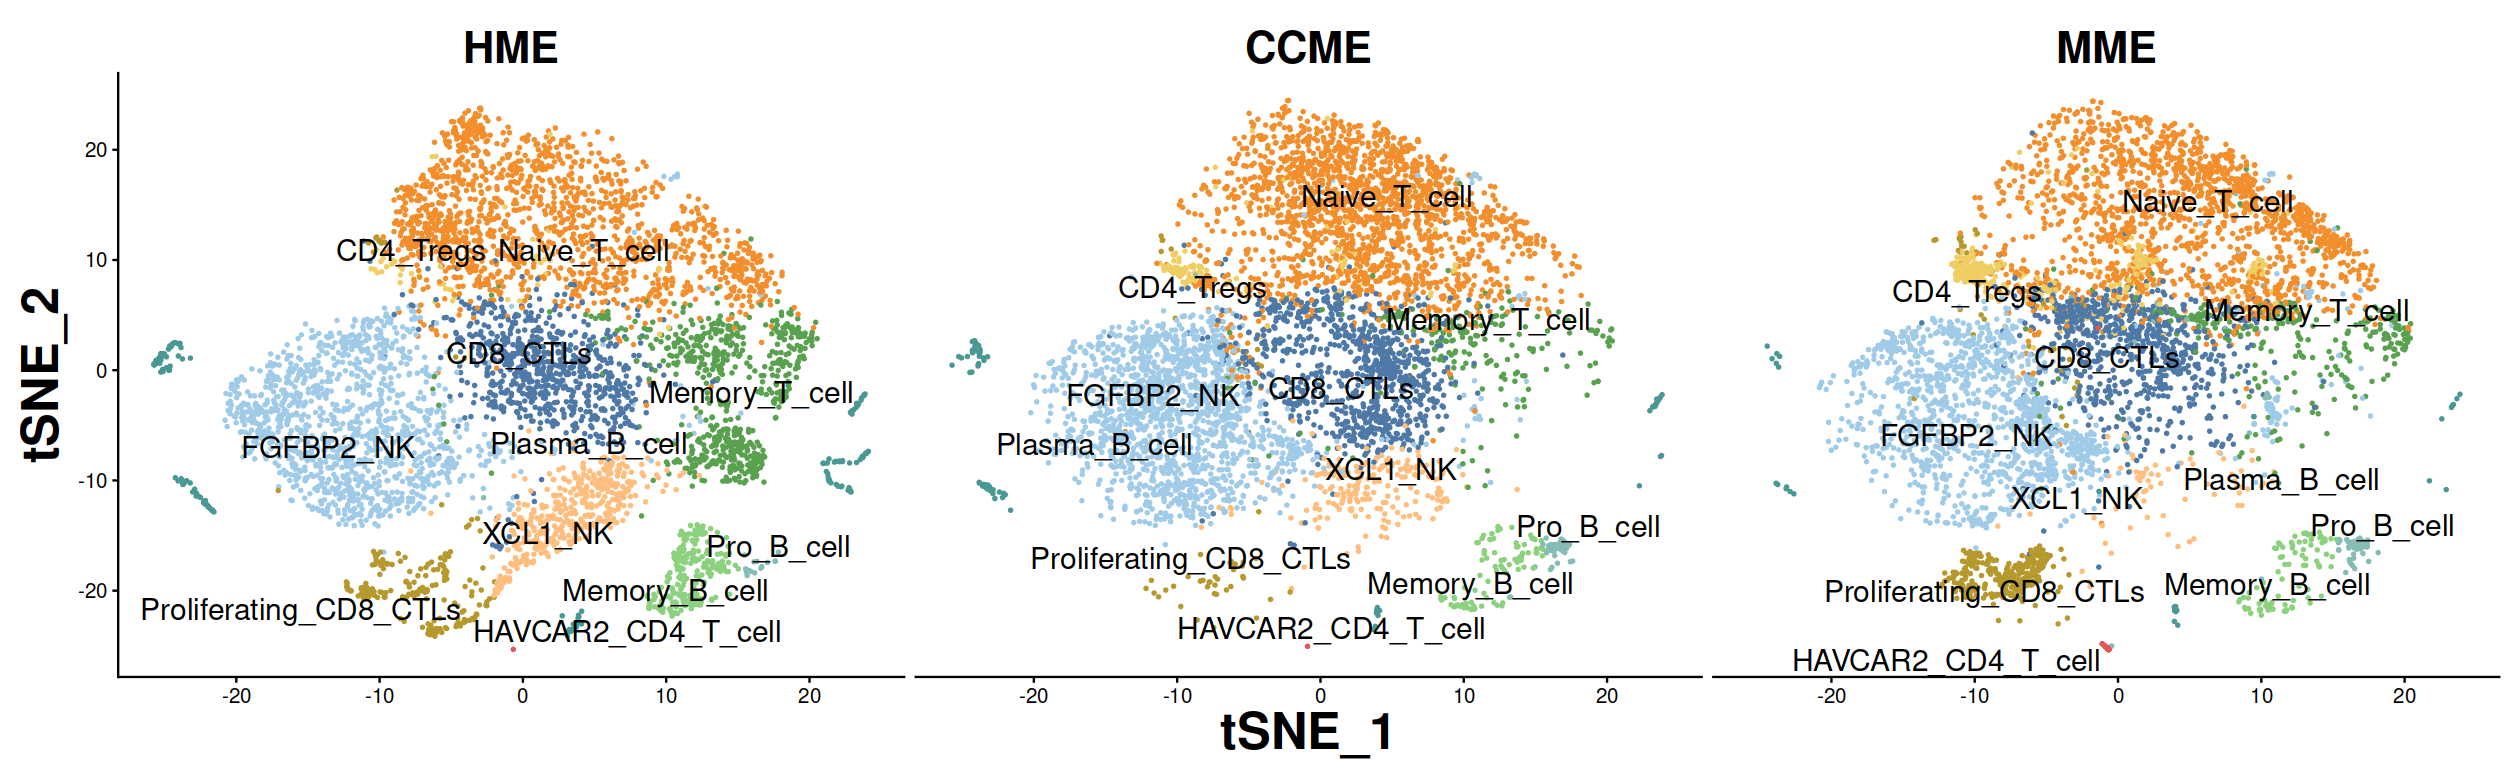

In [14]:
options(repr.plot.height = 6.5, repr.plot.width = 21)

p1 <- DimPlot(obj, reduction = "tsne",label = T, split.by = "sample_type", label.size = 6.2, pt.size = 0.5, repel = T, cols = new.cols) + 
NoLegend()+
#ggtitle("Combined:Lymphoid:5093 cells/sample_type")+
theme(text =  element_text(size = 30),#, face = "bold"),
    axis.title=element_text(size=30,face="bold"),
     plot.title = element_text(size=30, face='bold', hjust = 0.5),
    ) 

p1

options(repr.plot.height = 7, repr.plot.width = 7)

In [15]:
rm(obj)

# Lymphoid: Barchart for proportion

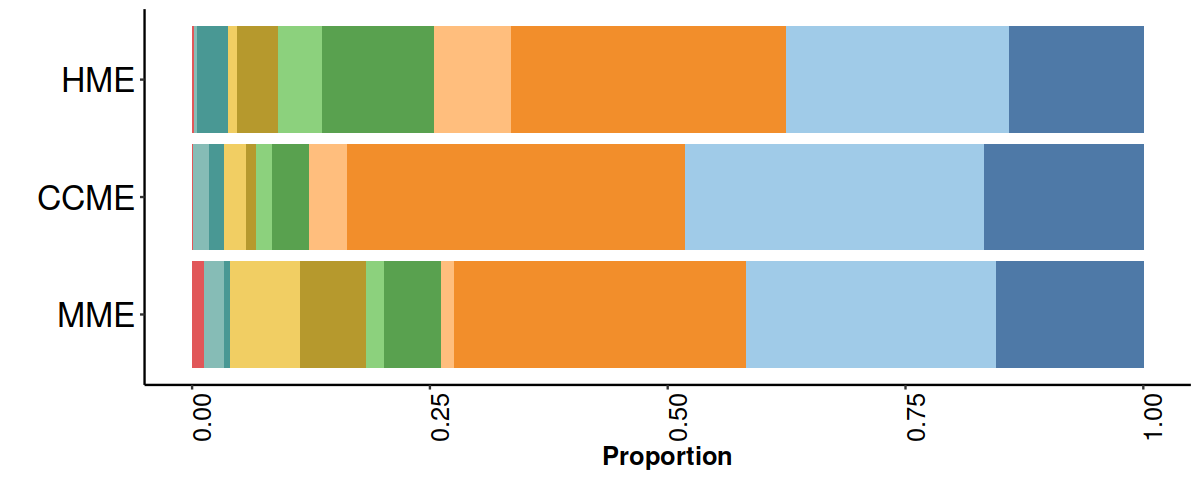

In [16]:
object$sample_type <- factor(object$sample_type, levels = c("MME", "CCME", "HME")) ## order sample_type (HME>CCME>MME)

p2 <- ggplot(object@meta.data, aes(x= sample_type, fill= cluster)) + geom_bar(position = "fill")+ coord_flip()+
scale_fill_manual(values=new.cols) +
theme_classic() + 
theme(axis.text.x = element_text(size = 15,angle= 90, color = "black"),
    axis.text.y = element_text(size=20, color="black"),
    plot.title = element_text(hjust = 0.5, size = 20),
    legend.text=element_text(size=12, color="black"), 
    legend.title = element_text(size = 14)) + 
theme(axis.title=element_text(size=15,face="bold")) + 
labs(x = "", y = "Proportion") + NoLegend()

options(repr.plot.height= 4,repr.plot.width= 10)
p2
options(repr.plot.height= 7,repr.plot.width= 7)

# Lymphoid: Heatmap for proportion

In [20]:
obj <- readRDS( "../processed_data/Obj6_New_ACC_nLung_nLiver_Lymphoid_FastMNN.rds")

count_df <- 
obj@meta.data %>% 
group_by(cluster, sample_type, site, patient_code) %>%
dplyr::count() %>%
dplyr::filter(site %in% c("Lung","Liver")) %>%
mutate(site=factor(site,levels=c("Lung","Liver")),
      sample_type=factor(sample_type,levels=c("Healthy","Adj_Tissue","ACC_Met")))

clusters <- unique(count_df$cluster)
coef_df <- data.frame()
for (cluster_ in clusters) {
    cluster_counts_df <- dplyr::filter(count_df,cluster == cluster_)
    
    unique_sites <- unique(cluster_counts_df$site)
    if (length(unique_sites) == 1)
        next
    
    out <- lme4::glmer(n ~ (1|patient_code) + site*sample_type, 
                      data=cluster_counts_df,family="poisson")  
        
    temp_df <- as.data.frame( coef(summary(out)) ) %>%
    tibble::rownames_to_column("coef") %>%
    dplyr::select(-c(`Std. Error`,`Estimate`)) %>%
    dplyr::filter(coef != "(Intercept)") %>%
    mutate(coef=gsub("site|sample_type","",coef)) %>%
    mutate(cell_type=cluster_)
    
    coef_df <- rbind(coef_df,temp_df)
}

p_value_df <- dplyr::select(coef_df,-`z value`)  %>%
mutate(coef=case_when(coef == "Liver" ~ "Liver vs Lung",
                     coef == "Adj_Tissue" ~ "CCME vs HME",
                     coef == "ACC_Met" ~ "MME vs HME",
                     TRUE ~ coef))
z_value_df <- dplyr::select(coef_df,-`Pr(>|z|)`) %>%
mutate(coef=case_when(coef == "Liver" ~ "Liver vs Lung",
                     coef == "Adj_Tissue" ~ "CCME vs HME",
                     coef == "ACC_Met" ~ "MME vs HME",
                     TRUE ~ coef))

z_value_mat <- tidyr::pivot_wider(z_value_df,names_from="coef",values_from="z value",
                  values_fill=0) %>% tibble::column_to_rownames("cell_type") %>%
as.matrix

p_value_mat <- tidyr::pivot_wider(p_value_df,names_from="coef",values_from="Pr(>|z|)",
                  values_fill=0) %>% tibble::column_to_rownames("cell_type") %>%
as.matrix

rm(obj)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00311895 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0021381 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00226238 (tol = 0.002, component 1)”


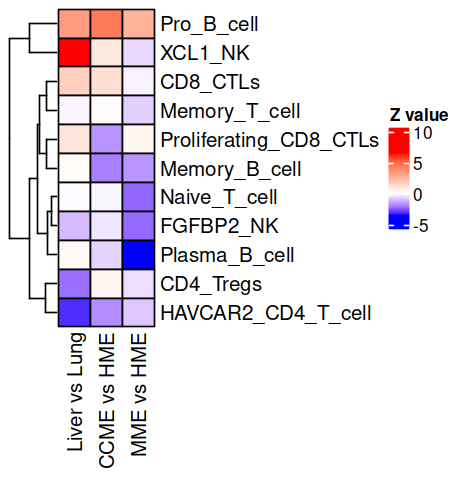

In [21]:
colors <- circlize::colorRamp2(c(min(z_value_mat),0,max(z_value_mat)),c("blue","white","red"))

options(repr.plot.width=3.8,repr.plot.height=4)
Heatmap( z_value_mat[, 1:3], na_col = "white", col=colors, 
        name="Z value", cluster_columns=F, cluster_rows=T, 
       rect_gp=gpar(lwd=1,col="black"))

# Lymphoid: Cluster Markers

In [3]:
markers <- read.csv("../processed_data/Obj6_New_ACC_nLung_nLiver_Lymphoid_Met_FastMNN_Cluster_Markers.csv")
top3 <- markers %>% group_by(cluster) %>% filter(avg_log2FC >= 1.5,p_val_adj < 0.05, pct.1 > 0.5, pct.2 < 0.5) %>% top_n(n = 5, wt = avg_log2FC)
unique(top3$gene)

[1] "GNLY"     "GZMB"     "NKG7"     "PRF1"     "CTSW"     "IL7R"    
 [7] "CCL3"     "TYROBP"   "FCER1G"   "XCL2"     "CCL4"     "CD74"    
[13] "HLA-DRA"  "IGHM"     "MS4A1"    "HLA-DRB5" "TUBA1B"   "HIST1H4C"
[19] "STMN1"    "TUBB"     "HMGB2"    "LTB"      "SSR4"     "IGKC"    
[25] "PRDX4"    "DERL3"    "TXNDC5"   "HLA-DPA1" "CST3"     "GPR183"  
[31] "C1QB"     "C1QA"     "C1QC"     "RNASE1"

In [37]:
markers2 <- FindMarkers(object = object, ident.1 = "CD8_CTLs")
markers2 <- arrange(markers2, avg_log2FC)
tail(markers2,10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCL4,0,0.3377422,0.870,0.687,0
IL32,0,0.3543560,0.891,0.725,0
CCL4L2,0,0.3612596,0.474,0.337,0
TRGC2,0,0.3661387,0.398,0.265,0
TRAC,0,0.4253918,0.704,0.495,0
CD8A,0,0.4517780,0.457,0.244,0
CCL5,0,0.4528578,0.917,0.725,0
CD3D,0,0.4949418,0.740,0.482,0
CD8B,0,0.5324659,0.367,0.122,0


In [7]:
object$cluster <- factor(object$cluster, levels = c('Plasma_B_cell','Proliferating_CD8_CTLs',
                                                  'FGFBP2_NK','Naive_T_cell','CD8_CTLs','CD4_Tregs',
                                                    'Pro_B_cell','XCL1_NK','Memory_B_cell','Memory_T_cell',
                                                  'HAVCAR2_CD4_T_cell')) ## order clusters
Idents(object) <- 'cluster'

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: HSP1AB, HLA-DQ1”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

png 
  2

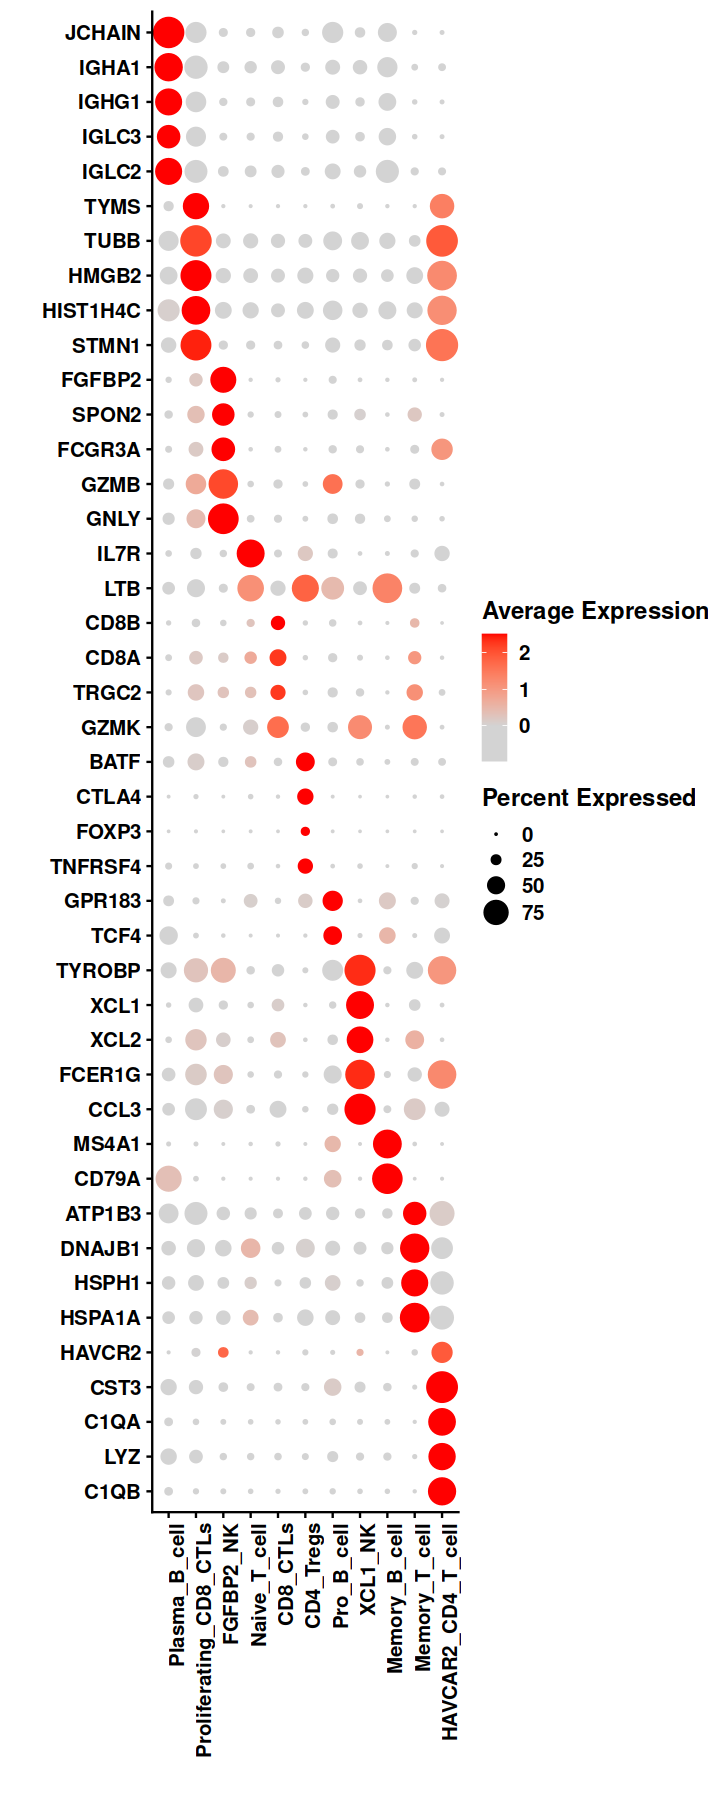

In [9]:
Features <- c('JCHAIN','IGHA1','IGHG1','IGLC3','IGLC2',
              'TYMS','TUBB','HMGB2','HIST1H4C','STMN1',
              'FGFBP2','SPON2','FCGR3A','GZMB','GNLY',
              'IL7R','LTB',
              'CD8B','CD8A','TRGC2','GZMK',
              'BATF','CTLA4','FOXP3','TNFRSF4',
              'GPR183','TCF4',
              'TYROBP','XCL1','XCL2','FCER1G','CCL3',
              'HLA-DQ1','MS4A1','CD79A',
              'ATP1B3','DNAJB1','HSPH1','HSPA1A','HSP1AB',
              'HAVCR2','CST3','C1QA','LYZ','C1QB')

p1 <- DotPlot(object, features = rev(Features), assay = "RNA", dot.scale = 8)+ RotatedAxis() +
labs(x = '', y = "") + theme(legend.text=element_text(size=12, color="black"), 
      legend.title = element_text(size = 14))+
scale_color_gradient2(low = "lightgrey", mid = "lightgrey", high = "red")+
theme(axis.text.x = element_text(size = 12,angle= 90),
axis.text.y = element_text(size=12, color="black")) +
theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold")) + coord_flip() #+ scale_y_discrete(limits=rev)

options(repr.plot.height = 15, repr.plot.width = 6)
p1
options(repr.plot.height = 7, repr.plot.width = 7)

# Lymphoid: GSEA Heatmap

In [ ]:
source(paste0(path,"code/deg_gsea_analysis.R"))

In [2]:
m_list <- readRDS("/data/Vishaka_Omar/Project/code/Obj6_ACC_New_nLung_nLiver_Lymphoid_major_cluster_FastMNN_Markers_Met_Adj_Normal_By_cluster.rds")

source("/data/Vishaka_Omar/Project/code/deg_gsea_analysis.R")
pathways <- gmtPathways(paste0(path,"code/msigdb/c5.go.bp.v7.2.symbols.xls"))
fgsea_out <- run_gsea(m_list,pathways, nperm = 5000)
fgsea_out_H <- fgsea_out %>% filter(padj < 0.05, abs(NES)>= 1.5) 

In [4]:
fgsea_out_H_filt <- filter(fgsea_out_H, pathway %in% c('GO_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS',
                                                       'GO_REGULATION_OF_IMMUNE_RESPONSE',
                                                       'GO_DEFENSE_RESPONSE',
                                                       'GO_LEUKOCYTE_MIGRATION',
                                                       'GO_POSITIVE_REGULATION_OF_LYMPHOCYTE_ACTIVATION',
                                                       'GO_REGULATION_OF_B_CELL_ACTIVATION',
                                                       'GO_B_CELL_MEDIATED_IMMUNITY',
                                                       'GO_HUMORAL_IMMUNE_RESPONSE',
                                                       'GO_ADAPTIVE_IMMUNE_RESPONSE',
                                                       'GO_LYMPHOCYTE_MEDIATED_IMMUNITY'
                                   ))

In [5]:
fgsea_out_H_filt$pathway <- sub('GO_', '', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('HALLMARK_', 'H: ', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('KEGG_', 'K: ', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('WP_', 'W: ', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('REACTOME_', 'R: ', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('POSITIVE', 'POS.', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- sub('REGULATION', 'REG.', fgsea_out_H_filt$pathway)
fgsea_out_H_filt$pathway <- gsub('_', ' ', fgsea_out_H_filt$pathway)

   A_vs_H    M_vs_A    M_vs_H 
"#EDF8B1" "#7FCDBB" "#2C7FB8" 


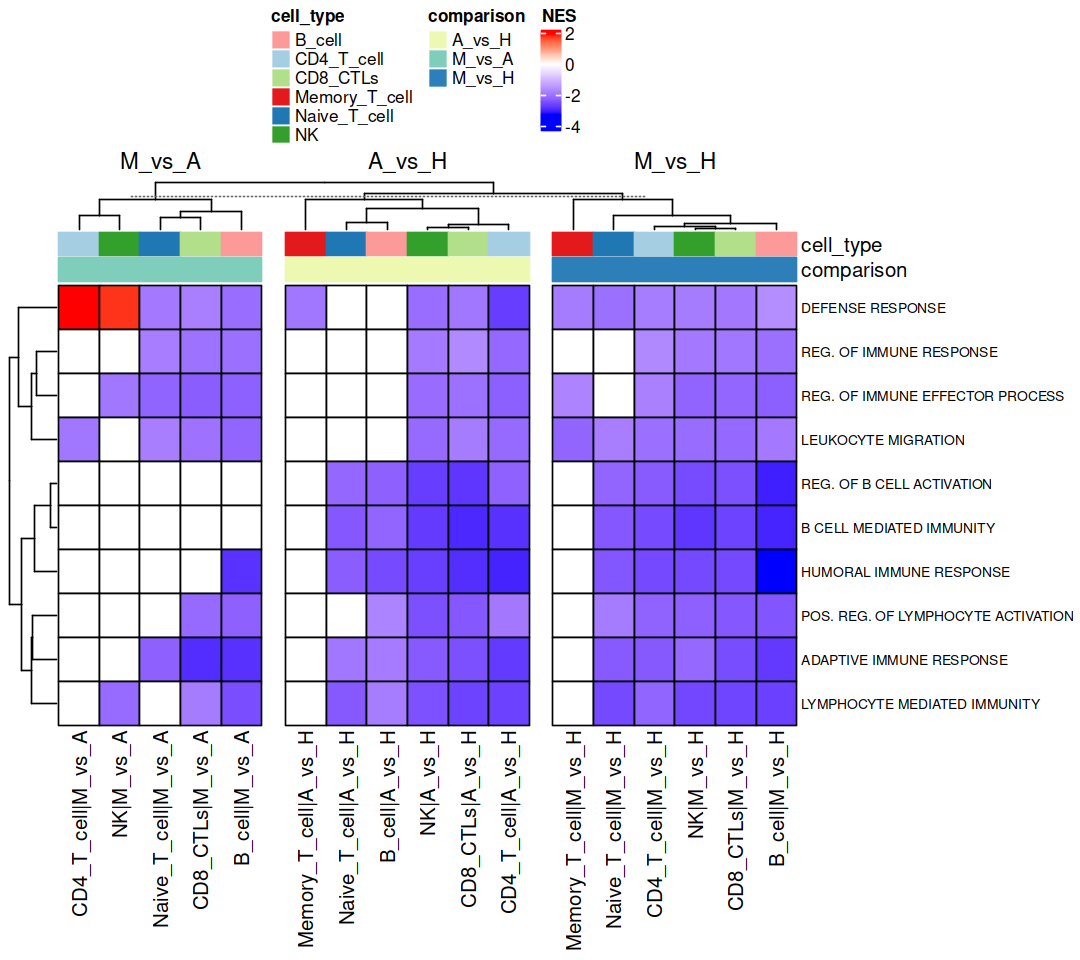

In [6]:
options(repr.plot.height= 8, repr.plot.width=9)
#set.seed(20)
plot_obj <- make_gsea_heatmap(fgsea_out_H_filt, min_comparisons_enriched = 10, group_heatmap = "clustering", 
                              num_row_clusters = 1)
options(repr.plot.height=7, repr.plot.width=7)

# Lymphoid: Cytotoxicity

In [22]:
Cytotoxic_Signatures <- list(c("GZMA","GZMB", "GZMH","GZMK","GZMM", "PRF1", "NKG7"))

object <- AddModuleScore(
  object = object,
  features = Cytotoxic_Signatures,
  ctrl = 100,assay = "RNA",#slot = "scale.data",
  name = "Cytotoxic_Signatures",
)

## subset NK and T-cells
NK_T <- subset(object, idents = c("CD8_CTLs", "FGFBP2_NK", "Naive_T_cell", "XCL1_NK", "Memory_T_cell", "Proliferating_CD8_CTLs"))

options(repr.plot.height = 6, repr.plot.width = 9)
NK_T$sample_type <- factor(NK_T$sample_type, levels = c("HME", "CCME", "MME")) ## order sample_type (HME>CCME>MME)

NK_T$sample_type_tme_cortisol_status <- paste0(NK_T$sample_type,":",NK_T$tme_cortisol_status)
NK_T$sample_type_tme_cortisol_status <- factor(NK_T$sample_type_tme_cortisol_status, levels = rev(c("HME:HME", "CCME:TME_CN", "CCME:TME_CP",
                                                                                    "MME:TME_CN","MME:TME_CP"))) ## order sample_type_tme_cortisol_status

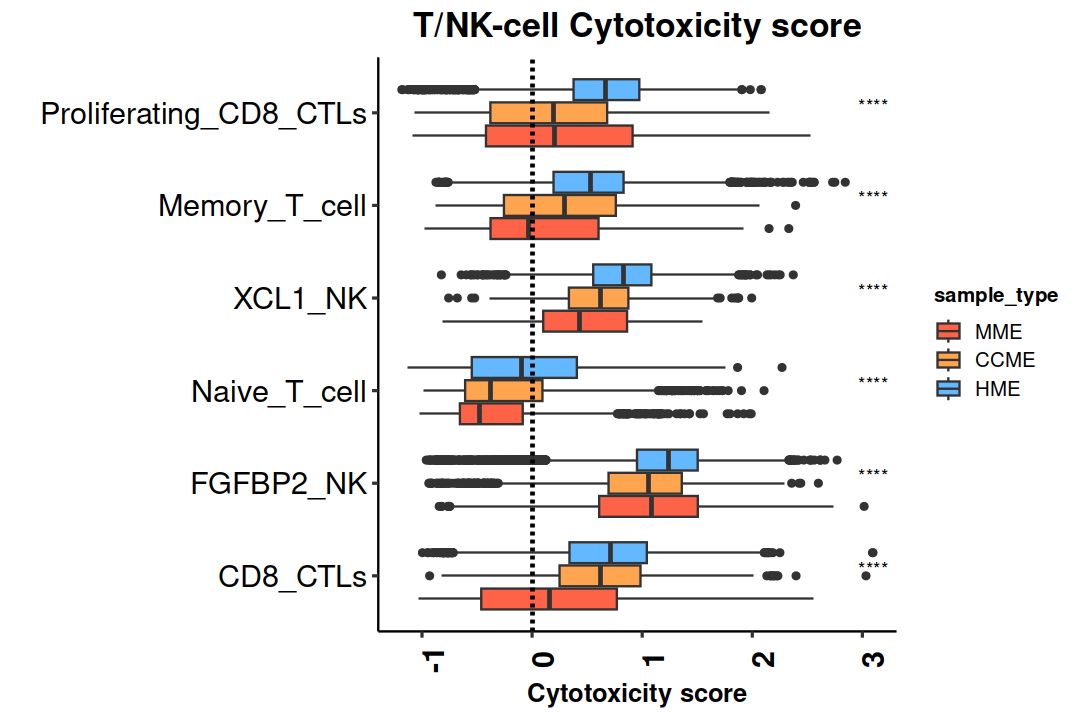

In [27]:
p1 <- ggplot(NK_T@meta.data, aes(cluster, Cytotoxic_Signatures1)) +
geom_boxplot(aes(fill = sample_type))+ 
scale_color_manual(values = c("tomato","tan1", "steelblue1")) +
scale_fill_manual(values = c("tomato","tan1", "steelblue1"))+
stat_compare_means(aes(group = sample_type), method = "anova", label = "p.signif") +
theme_pubr(base_size=15)+ coord_flip() + geom_hline(yintercept= 0.0, linetype="dashed", size = 1) +
ggtitle("T/NK-cell Cytotoxicity score")+  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))+
labs(x = '', y = "Cytotoxicity score") +theme(axis.title=element_text(size=15,face="bold")) +
theme(axis.text.x = element_text(size = 18, face = "bold",angle= 90),
axis.text.y = element_text(size=18, color="black")) +
theme(legend.text=element_text(size=12, color="black"), 
      legend.title = element_text(size = 12, face = "bold"), legend.position="right")

p1

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


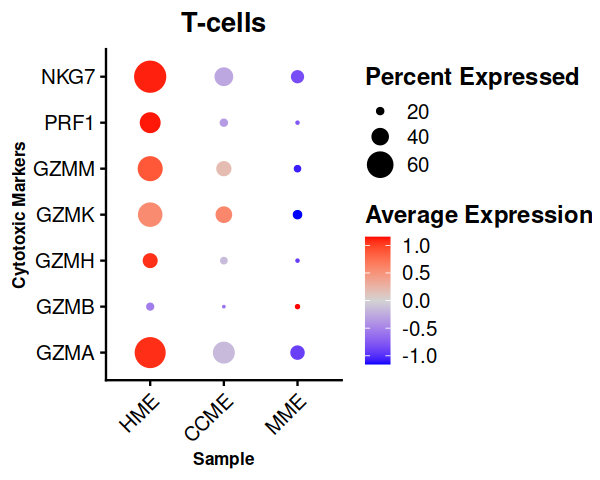

In [29]:
Tcell <- subset(object, idents = c("CD8_CTLs", "Naive_T_cell", "Memory_T_cell", "Proliferating_CD8_CTLs",
                                 "HAVCAR2_CD4_T_cell", "CD4_Tregs"))
Cytotoxic_markers <- c("GZMA","GZMB", "GZMH","GZMK","GZMM", "PRF1", "NKG7")

Tcell$sample_type <- factor(Tcell$sample_type, levels = c("HME", "CCME", "MME")) ## order sample_type (HME>CCME>MME)

options(repr.plot.height = 4, repr.plot.width = 5)
p1 <- DotPlot(Tcell, features  = Cytotoxic_markers, group.by = "sample_type", #cols = c("gray", "red"),
        col.min = -2,col.max = 2.0, 
        assay = "RNA",  dot.scale = 8)+ coord_flip()+ RotatedAxis() +
scale_colour_gradient2(low="blue", mid="lightgrey", high="red")+
labs( y = "Sample", x = "Cytotoxic Markers") + theme(legend.text=element_text(size=12, color="black"), 
      legend.title = element_text(size = 14, face = "bold"))+
theme(axis.text.x = element_text(size = 12),
axis.text.y = element_text(size=12, color="black")) +
theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))+
ggtitle("T-cells")+ theme(axis.title=element_text(size=10,face="bold"))  + 
theme(plot.title = element_text(hjust = 0.5))

p1

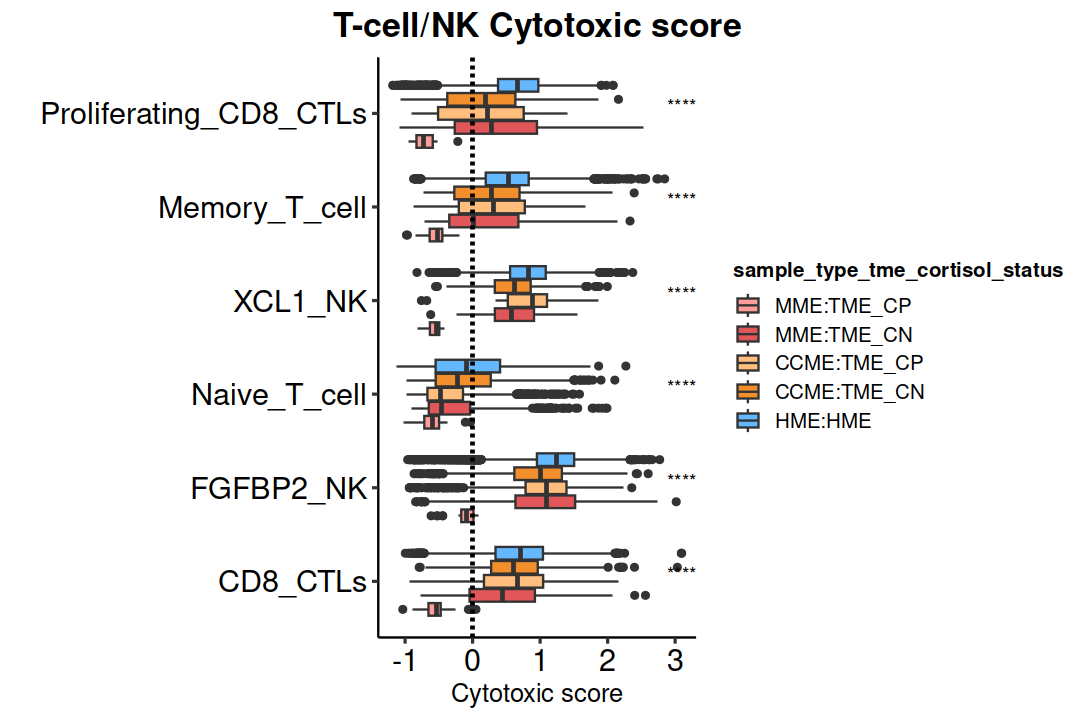

In [26]:
p1 <- ggplot(NK_T@meta.data, aes(cluster, Cytotoxic_Signatures1)) +
geom_boxplot(aes(fill = sample_type_tme_cortisol_status))+ 
scale_fill_manual(values=c("#FF9D9A", '#E15759', "#FFBE7D",'#F28E2B', 'steelblue1'))+
stat_compare_means(aes(group = sample_type_tme_cortisol_status), method = "anova", label = "p.signif") +
theme_pubr(base_size=15)+ coord_flip() + geom_hline(yintercept= 0.0, linetype="dashed", size = 1) +
ggtitle("T-cell/NK Cytotoxic score")+  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))+
labs(x = '', y = "Cytotoxic score") +theme(axis.title=element_text(size=15)) +
theme(axis.text.x = element_text(size = 18,angle= 0),
axis.text.y = element_text(size=18, color="black")) +
theme(legend.text=element_text(size=12, color="black"), 
      legend.title = element_text(size = 12, face = "bold"), legend.position="right")

p1

In [36]:
rm(NK_T)

# Lymphoid: Exhaustion

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


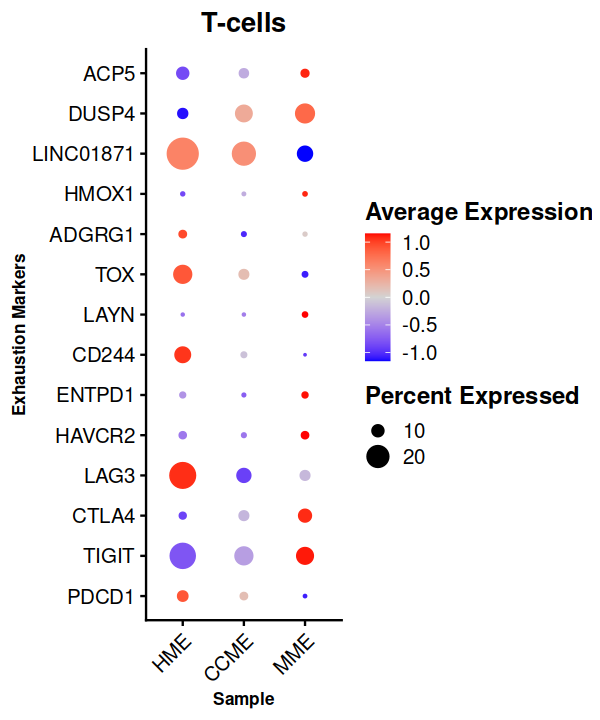

In [30]:
Features <- c("PDCD1", "TIGIT", "CTLA4", "LAG3", "HAVCR2", "ENTPD1", "CD244", "LAYN", "TOX", "ADGRG1",
  "HMOX1", "LINC01871", "DUSP4","ACP5")

Tcell <- subset(object, idents = c("CD8_CTLs", "Naive_T_cell", "Memory_T_cell", "Proliferating_CD8_CTLs",
                                 "HAVCAR2_CD4_T_cell", "CD4_Tregs"))

Tcell$sample_type <- factor(Tcell$sample_type, levels = c("HME", "CCME", "MME")) ## order sample_type (HME>CCME>MME)

options(repr.plot.height = 6, repr.plot.width = 5)
p1 <- DotPlot(Tcell, features  = Features, group.by = "sample_type", #cols = c("gray", "red"),
        col.min = -2.0,col.max = 2.0, 
        assay = "RNA",  dot.scale = 8)+ coord_flip()+ RotatedAxis() +
scale_colour_gradient2(low="blue", mid="lightgrey", high="red")+
labs( y = "Sample", x = "Exhaustion Markers") + theme(legend.text=element_text(size=12, color="black"), 
      legend.title = element_text(size = 14, face = "bold"))+
theme(axis.text.x = element_text(size = 12),
axis.text.y = element_text(size=12, color="black")) +
theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))+
ggtitle("T-cells")+ theme(axis.title=element_text(size=10,face="bold")) + 
theme(plot.title = element_text(hjust = 0.5))

p1

In [31]:
# Exhausted T cell signature: https://www.nature.com/articles/s41467-022-35238-w#Sec38
signatures <- list(exhausted = c("GZMB", "CRTAM", "RGS1", "CCL5", "DUSP4", "LAG3", "VCAM1", "PRDM1",
        "GZMH", "TNFRSF9", "CD8A", "IGKC", "NKG7", "CLEC2B", "HAVCR2",
        "HLA-DRB1", "CCL3", "GAPDH", "RBPJ", "PTMS", "ALOX5AP", "MT2A",
        "PDCD1", "CTLA4", "HSPB1", "COTL1", "FABP5", "SH3BGRL3", "CXCL13",
        "GZMA", "RGS2", "TRBC2", "CD3D", "CXCR6", "CD27", "HLA-DRA",
        "ENTPD1", "ANKRD28", "HLA-DQA1", "HLA-DPA1", "PHLDA1", "IFI16",
        "TXNIP", "IKZF3", "MT-RNR1", "SAMSN1", "NFIL3", "PTPN22", "HLA-DPB1",
        "ZEB2"))

In [35]:
# Function to perform AUCell signature scoring
perform_aucell_scoring <- function(seurat_obj, 
                                   gene_signatures, 
                                   assay = "RNA") {
    
  expr_matrix <- GetAssayData(seurat_obj, assay = assay, slot = "data")
  gene_rankings <- AUCell_buildRankings(expr_matrix, 
                                        plotStats = FALSE)
  signature_auc <- AUCell_calcAUC(gene_signatures, 
                                  gene_rankings, 
                                  aucMaxRank = nrow(expr_matrix) * 0.05)
  auc_matrix <- as.matrix(signature_auc@assays@data$AUC)
    
  for(sig_name in rownames(auc_matrix)) {
    seurat_obj[[paste0(sig_name, "_AUCell")]] <- auc_matrix[sig_name,]
  }
  
  return(seurat_obj)
}

In [37]:
Tcell <- perform_aucell_scoring(Tcell, signatures)

Genes in the gene sets NOT available in the dataset: 
	exhausted: 	1 (2% of 50)



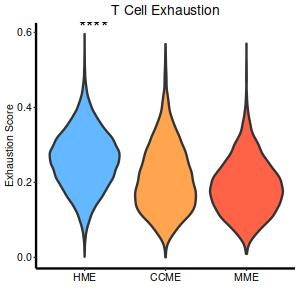

In [34]:
pE <- ggplot(Tcell@meta.data
             , aes(x = sample_type, y = exhausted_AUCell, fill = sample_type)) + 
    geom_violin() + 
    stat_compare_means(aes(group = sample_type), method = "anova", label = "p.signif") + 
    scale_fill_manual(values = c('steelblue1', 'tan1', 'tomato')) + 
    theme_pubr(base_size = 6, legend = 'right') + 
    labs(x = '', y = 'Exhaustion Score', title = 'T Cell Exhaustion', fill = '') + 
    theme(plot.title = element_text(size = 8, hjust = 0.5)) + 
    NoLegend()

options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pE
options(repr.plot.width = 7, repr.plot.height = 7)